# BPTK PY Demo

For live demonstration purposes, without lot's of text.

![Simple Project Management Model](images/intro/simple_project_diagram.png)

### Setting up Scenarios and Scenario Managers

In [1]:
## BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

print("Available Scenario Managers and Scenarios:")

managers = bptk.scenario_manager_factory.get_scenario_managers(scenario_managers_to_filter=[])

for key, manager in managers.items():
     print("")
     print("*** {} ***".format(key))

     for name in manager.get_scenario_names():
         print("\t {}".format(name))

Available Scenario Managers and Scenarios:

*** smSimpleProjectManagementDslClass ***
	 scenario100_strategy
	 scenario100
	 scenario80
	 scenario120

*** ABMsmSimpleProjectManagement ***
	 scenario80
	 scenario100
	 scenario120
	 scenario80DT1
	 scenario100SM2D50
	 scenario100SM2D90

*** anotherSimpleProjectManagement ***
	 scenario100
	 scenario80
	 scenario120

*** smSimpleProjectManagement ***
	 base
	 scenario100
	 scenario80
	 scenario120
	 scenario100WithPoints

*** smInteractive ***
	 scenario100

*** smSimpleProjectManagementV0 ***
	 base
	 scenario100
	 scenario80
	 scenario120

*** ABMsmBass ***
	 scenarioBassBase


In [2]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").dictionary

{'initialOpenTasks': 100,
 'constants': {'deadline': 100,
  'effortPerTask': 1,
  'initialOpenTasks': 100,
  'initialStaff': 1},
 'points': {'productivity': [[0, 0.4],
   [0.25, 0.444],
   [0.5, 0.506],
   [0.75, 0.594],
   [1, 1],
   [1.25, 1.119],
   [1.5, 1.1625],
   [1.75, 1.2125],
   [2, 1.2375],
   [2.25, 1.245],
   [2.5, 1.25]]}}

In [3]:
bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").dictionary

{'constants': {'initialOpenTasks': 80,
  'deadline': 100,
  'effortPerTask': 1,
  'initialStaff': 1},
 'points': {'productivity': [[0, 0.4],
   [0.25, 0.444],
   [0.5, 0.506],
   [0.75, 0.594],
   [1, 1],
   [1.25, 1.119],
   [1.5, 1.1625],
   [1.75, 1.2125],
   [2, 1.2375],
   [2.25, 1.245],
   [2.5, 1.25]]}}

### Plotting Scenario Results
#### Example 1: Multiple Equations for one scenario

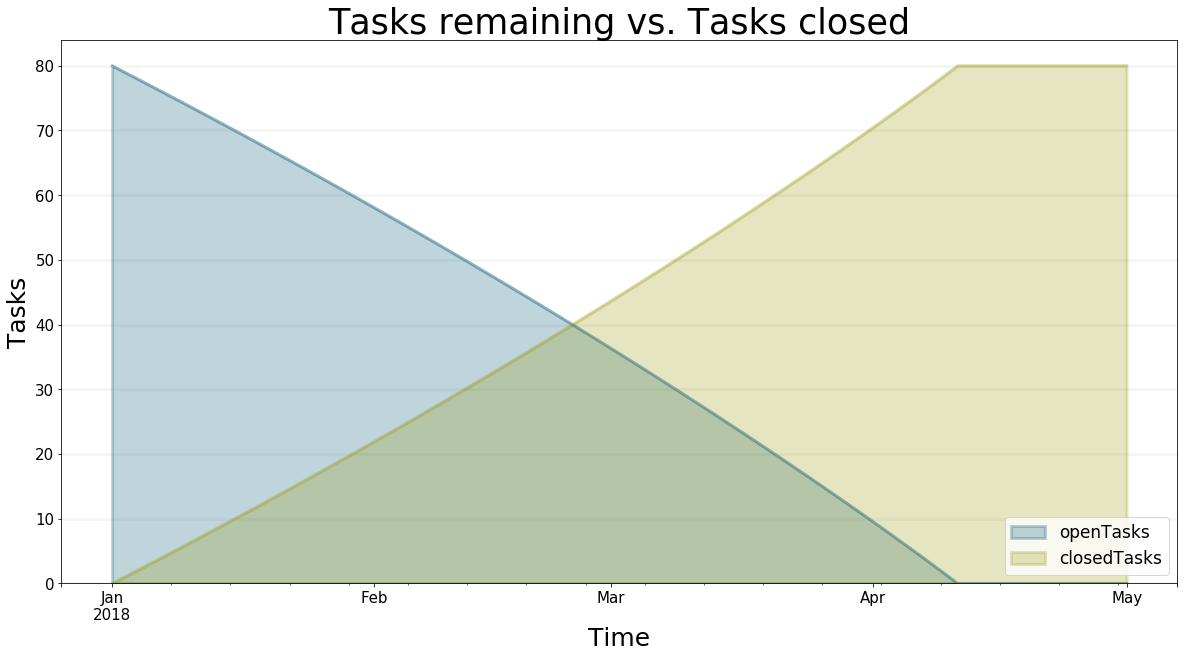

In [4]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80"], 
    equations=['openTasks','closedTasks'],
    title="Tasks remaining vs. Tasks closed",
    freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks"
)

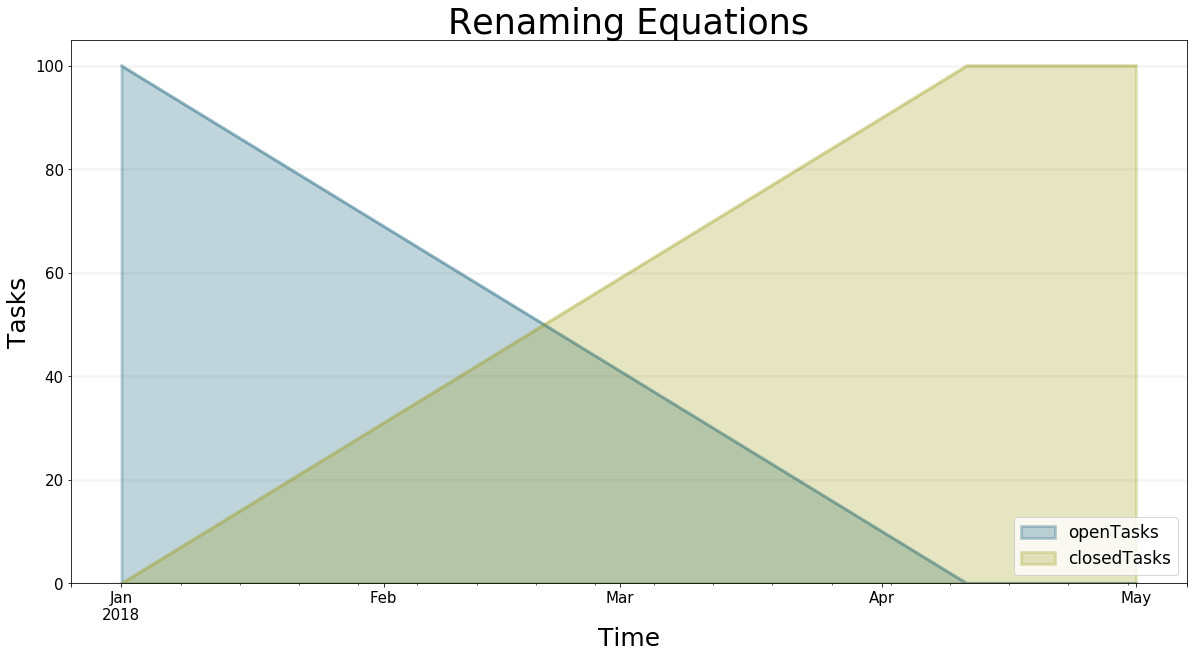

In [5]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario100"], 
    equations=['openTasks','closedTasks'],
    title="Renaming Equations",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={"openTasks" : "Open Tasks","closedTasks" : "Closed Tasks"}
)

#### Example 2: Plot one equation for multiple scenarios

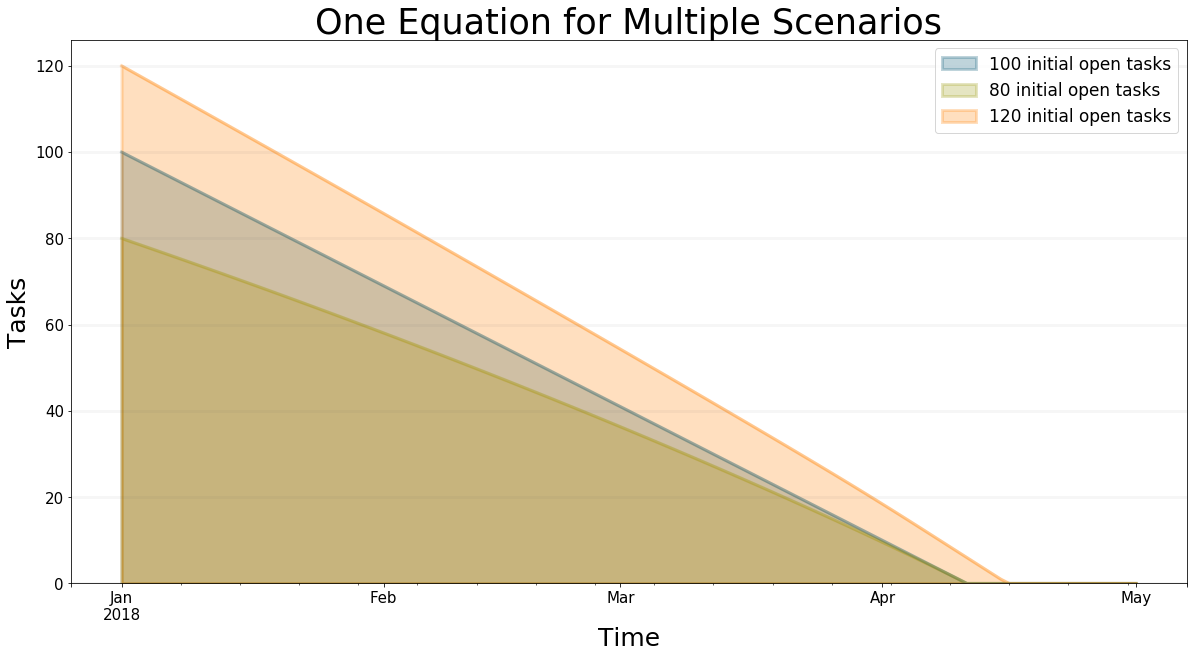

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80","scenario100","scenario120"],
    equations=["openTasks"],
    title="One Equation for Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={
        "smSimpleProjectManagement_scenario80_openTasks":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_openTasks":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_openTasks":"120 initial open tasks"
    }
)

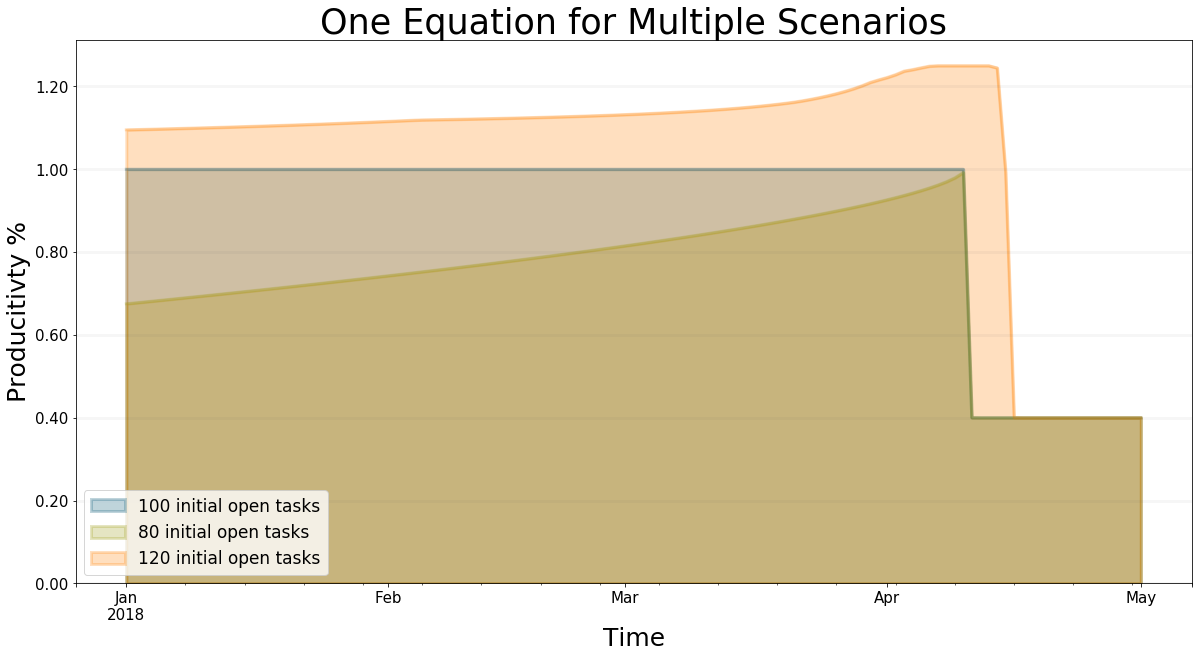

In [7]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80","scenario100","scenario120"],
    equations=["productivity"],
    title="One Equation for Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Producitivty %",
    series_names={
        "smSimpleProjectManagement_scenario80_productivity":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_productivity":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_productivity":"120 initial open tasks"
    }
)

## Changing the graph type

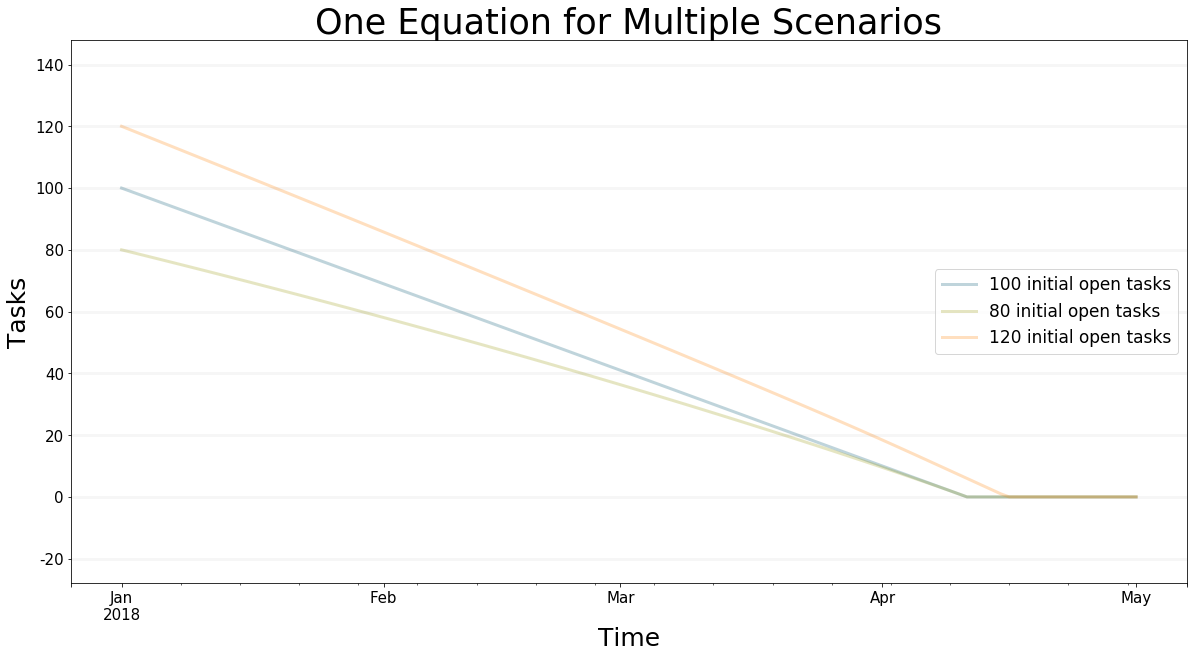

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80","scenario100","scenario120"],
    equations=["openTasks"],
    kind="line",
    title="One Equation for Multiple Scenarios",
     freq="D",
    start_date="1/1/2018",
    x_label="Time",
    y_label="Tasks",
    series_names={
        "smSimpleProjectManagement_scenario80_openTasks":"80 initial open tasks",
        "smSimpleProjectManagement_scenario100_openTasks":"100 initial open tasks",
        "smSimpleProjectManagement_scenario120_openTasks":"120 initial open tasks"}
)

## Accessing the Underlying Data

In [9]:
data=bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario80"],
     freq="D",
    start_date="1/1/2018",
    equations=["openTasks","closedTasks","completionRate","remainingTime","schedulePressure","productivity"],
    return_df=True
)

In [10]:
data.head()

,openTasks,closedTasks,completionRate,remainingTime,schedulePressure,productivity
2018-01-01,80.000000,0.000000,0.675200,100,0.800000,0.675200
2018-01-02,79.324800,0.675200,0.677247,99,0.801261,0.677247
2018-01-03,78.647553,1.352447,0.679302,98,0.802526,0.679302
2018-01-04,77.968250,2.031750,0.681365,97,0.803796,0.681365
2018-01-05,77.286885,2.713115,0.683436,96,0.805072,0.683436


In [11]:
data.iloc[4]

openTasks           77.286885
closedTasks          2.713115
completionRate       0.683436
remainingTime       96.000000
schedulePressure     0.805072
productivity         0.683436
Name: 2018-01-05 00:00:00, dtype: float64

## Interactive Simulation Dashboards

In [12]:
bptk.dashboard(
    scenario_managers=["smInteractive"],
    scenarios=["scenario100"],
    kind="area",
    equations=["openTasks"],
    series_names={"openTasks":"Open Tasks"},
    freq="D",
    start_date="",
    title="Interactive Simulation Dashboard",
    x_label="Date",
    y_label="€",
    constants=[("slider",'initialOpenTasks',50.0,100.0),("slider","deadline",0,150),("timerange")]
    )

interactive(children=(FloatSlider(value=50.0, continuous_update=False, description='initialOpenTasks', layout=…

You can also use the generated model to build an analytical web app - here is an [example](https://prototypes.transentis.com/pm_sd) based in the Simple Project Management Framework, built using the [Dash framework](https://plot.ly/products/dash/).

## Accessing Model Information

In [13]:
bptk.scenario_manager_factory.get_scenarios()["smSimpleProjectManagement_scenario100"].model.stocks

['closedTasks', 'openTasks', 'staff']

In [14]:
bptk.scenario_manager_factory.get_scenarios()["smSimpleProjectManagement_scenario100"].model.constants

['deadline', 'effortPerTask', 'initialOpenTasks', 'initialStaff']

In [15]:
for constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.constants:
    print (constant+": "+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario100").model.equations[constant](0)))

deadline: 100
effortPerTask: 1
initialOpenTasks: 100
initialStaff: 1


In [16]:
for constant in bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").model.constants:
    print (constant+": "+str(bptk.scenario_manager_factory.get_scenario("smSimpleProjectManagement","scenario80").model.equations[constant](0)))

deadline: 100
effortPerTask: 1
initialOpenTasks: 80
initialStaff: 1


# Adding a new variable

In [17]:
bptk.reset_all_scenarios()

{'smSimpleProjectManagementDslClass': <BPTK_Py.scenariomanager.scenario_manager_sd.ScenarioManagerSD at 0x118c33eb8>,
 'ABMsmSimpleProjectManagement': <BPTK_Py.scenariomanager.scenario_manager_abm.ScenarioManagerABM at 0x118c0a978>,
 'anotherSimpleProjectManagement': <BPTK_Py.scenariomanager.scenario_manager_sd.ScenarioManagerSD at 0x118c2e5c0>,
 'smSimpleProjectManagement': <BPTK_Py.scenariomanager.scenario_manager_sd.ScenarioManagerSD at 0x118fae940>,
 'smInteractive': <BPTK_Py.scenariomanager.scenario_manager_sd.ScenarioManagerSD at 0x118fa5048>,
 'smSimpleProjectManagementV0': <BPTK_Py.scenariomanager.scenario_manager_sd.ScenarioManagerSD at 0x118fb4e80>,
 'ABMsmBass': <BPTK_Py.scenariomanager.scenario_manager_abm.ScenarioManagerABM at 0x118bfa940>}

Hint: the following only works if you add a new converter "Total Tasks" to the sd_simple_project.itmx model in the simulation model folder.

In [18]:
bptk.plot_scenarios(
    scenario_managers=["smSimpleProjectManagement"],
    scenarios=["scenario100"], 
    equations=['totalTasks'],
    title="Total Tasks"
)

TypeError: Empty 'DataFrame': no numeric data to plot